In [1]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving India.csv to India.csv


In [2]:
import io

data = pd.read_csv(io.BytesIO(uploaded['India.csv']))
data

,Date,State,Confirmed,Recovered,Deceased,Other,Tested,Daily confirmed
0,13-03-2020,India,91,3,1,0,6500,10
1,14-03-2020,India,102,3,1,3,6500,11
2,15-03-2020,India,112,3,1,3,6500,10
3,16-03-2020,India,126,3,1,3,6500,14
4,17-03-2020,India,146,3,1,3,6500,20
...,...,...,...,...,...,...,...,...
388,5/4/2021,India,12684488,11730061,165578,5011,250231269,96563
389,6/4/2021,India,12799800,11789775,166208,5149,251439598,115312
390,7/4/2021,India,12926076,11848912,166892,5246,252677379,126276
391,8/4/2021,India,13057954,11910741,167694,5286,254041584,131878


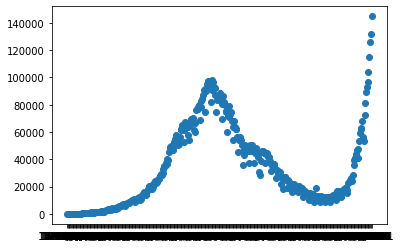

In [3]:
import matplotlib.pyplot as plt

x=data['Date']
y=data['Daily confirmed']
plt.scatter(x,y)

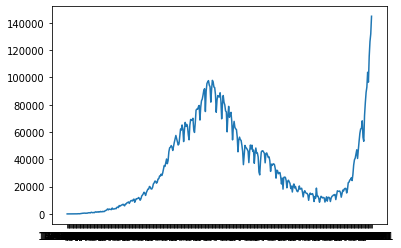

In [4]:
plt.plot(x, y);

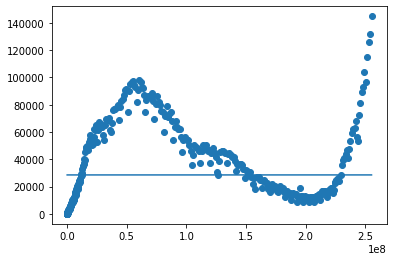

In [11]:
from sklearn.linear_model import LinearRegression
#x1=data['Tested']
#y1=data['Daily confirmed']

x1 = data.iloc[:, 6].values 
y1 = data.iloc[:, 7].values
x_seq=np.linspace(x1.min(),x1.max(),len(y1)).reshape(-1,1)

X=np.array(data['Tested']).reshape(-1,1)
Y=np.array(y1).reshape(-1,1)
#model = LinearRegression(fit_intercept=True)

#model.fit(x1[:, np.newaxis], y1)

#xfit = np.linspace(0, 10, 1000)
#yfit = model.predict(xfit[:, np.newaxis])

lin = LinearRegression() 
lin.fit(X, Y) 

plt.scatter(X, Y)
plt.plot(X,lin.predict(Y))

plt.show()


In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline

In [ ]:
#X = data.iloc[:, 1:2].values 

In [44]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

#poly = PolynomialFeatures(degree = 2) 
#X_poly = poly.fit_transform(X) 
#print(X_poly)
#poly.fit(X_poly, y) 
#lin2 = LinearRegression() 
#lin2.fit(X, y) 

degree=3
polyreg=make_pipeline(PolynomialFeatures(degree,order='F'),LinearRegression(normalize=True))
polyreg.fit(X,y)
print(polyreg.get_params())

{'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='F')), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True))], 'verbose': False, 'polynomialfeatures': PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='F'), 'linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True), 'polynomialfeatures__degree': 3, 'polynomialfeatures__include_bias': True, 'polynomialfeatures__interaction_only': False, 'polynomialfeatures__order': 'F', 'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'linearregression__n_jobs': None, 'linearregression__normalize': True}


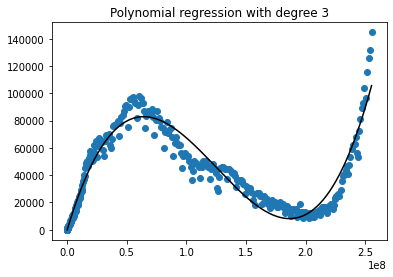

In [45]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X,y)
plt.plot(x_seq,polyreg.predict(x_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(data['Daily confirmed'], polyreg.predict(x_seq)))
print(rmse)

38391.59712512405


In [47]:
# c=np.corrcoef(data['Daily confirmed'], polyreg.predict(x_seq))
# r=c[0,1]
# r_sq=r**2
# print(r)

res=y1-polyreg.predict(x_seq)
ress=np.square(res)
rss=np.sum(ress)

tss=np.sum(np.square(y1))
r=(rss/tss)
r

0.7430416656954388

In [48]:
np.corrcoef(polyreg.predict(x_seq),data['Daily confirmed'])**2

array([[1.        , 0.03385216],
       [0.03385216, 1.        ]])